## Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import codecs
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
sb.set() # set the default Seaborn style for graphics

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

# Import data

In [2]:
#Read CSV file
df = pd.read_csv("listings_june.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,https://www.airbnb.com/rooms/49091,20210629180711,2021-06-30,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.00,4.00,NaN,f,2,0,2,0,0.01
1,50646,https://www.airbnb.com/rooms/50646,20210629180711,2021-06-30,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,...,4.94,4.72,4.50,NaN,f,1,0,1,0,0.22
2,56334,https://www.airbnb.com/rooms/56334,20210629180711,2021-06-30,COZICOMFORT,<b>The space</b><br />This is Room no. 1. USD7...,NaN,https://a0.muscache.com/pictures/20783922/1966...,266763,https://www.airbnb.com/users/show/266763,...,5.00,4.17,4.67,NaN,f,2,0,2,0,0.16
3,71609,https://www.airbnb.com/rooms/71609,20210629180711,2021-06-30,Ensuite Room (Room 1 & 2) near EXPO,For 3 rooms.Book room 1&2 and room 4<br /><br ...,NaN,https://a0.muscache.com/pictures/24453191/3580...,367042,https://www.airbnb.com/users/show/367042,...,4.78,4.26,4.32,NaN,t,4,0,4,0,0.29
4,71896,https://www.airbnb.com/rooms/71896,20210629180711,2021-06-30,B&B Room 1 near Airport & EXPO,<b>The space</b><br />Vocational Stay Deluxe B...,NaN,https://a0.muscache.com/pictures/2440674/ac4f4...,367042,https://www.airbnb.com/users/show/367042,...,4.43,4.17,4.04,NaN,t,4,0,4,0,0.34


# Putting price and amenities into the same dataframe to compare

In [3]:
amenities = df[['price','amenities']]

amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
amenities['amenities'] = amenities['amenities'].str.replace('[', '').str.replace(']','').str.replace('"','')
#.str.replace(' ','')
#amenities = amenities.to_frame()

amenities.head()

C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/4020178996.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/4020178996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['price'] = amenities['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/4020178996.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single

,price,amenities
0,81.0,"Air conditioning, Elevator, Wifi, Long term st..."
1,80.0,"Air conditioning, Kitchen, Elevator, Wifi, Gym..."
2,67.0,"Air conditioning, Kitchen, Elevator, Wifi, Cab..."
3,177.0,"Wifi, Washer, Kitchen, Long term stays allowed..."
4,81.0,"Wifi, Washer, Kitchen, Long term stays allowed..."


# Check count of how many amenities are there in total

In [4]:
#amenities['amenities'].str.split(',', 1, expand=True)
amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')
a = amenities['amenities'].str.split(', ', expand=True).stack().value_counts()
test_df = a.rename_axis('amenities').reset_index(name='count')

C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/3608025537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities'] = amenities['amenities'].str.decode('unicode_escape')


In [5]:
print_full(test_df)

                                             amenities  count
0                              Long term stays allowed   4157
1                                     Air conditioning   4107
2                                                 Wifi   4086
3                                           Essentials   3641
4                                               Washer   3603
5                                              Hangers   3432
6                                              Kitchen   3335
7                                                 Iron   3247
8                                  Dedicated workspace   3186
9                                           Hair dryer   3004
10                                               Dryer   2794
11                                           Hot water   2697
12                                             Shampoo   2670
13                                        Refrigerator   2217
14                                            Elevator   2147
15      

# Bar graph of amenity count

<BarContainer object of 15 artists>

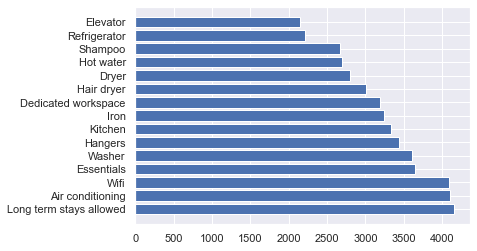

In [6]:
#f, ax = plt.subplots(figsize=(20,5))
#plt.plot(test_df['amenities'], test_df['count'], kind='bar')
#plt.figure(figsize=(5,5))
plt.barh(test_df['amenities'].head(15), test_df['count'].head(15))

#temp = test_df['amenities'].value_counts()
#temp2 = temp.head(10)
#if len(temp) > 10:
    #temp2['remaining {0} items'.format(len(temp) - 10)] = sum(temp[10:])
#temp2.plot(kind='barh')

# Put price and rating into same dataframe to compare

In [7]:
pricedf = df[['price', 'review_scores_rating']]
pricedf.head()

,price,review_scores_rating
0,$81.00,5.00
1,$80.00,4.56
2,$67.00,4.88
3,$177.00,4.44
4,$81.00,4.16


In [8]:
#remove extra unnecessary symbols and change price to float
pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
pricedf.head()

C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/1771786605.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/1771786605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pricedf['price'] = pricedf['price'].str.replace(',', '').str.replace('$', '').astype(float)


,price,review_scores_rating
0,81.0,5.00
1,80.0,4.56
2,67.0,4.88
3,177.0,4.44
4,81.0,4.16


# Plot ratings against price

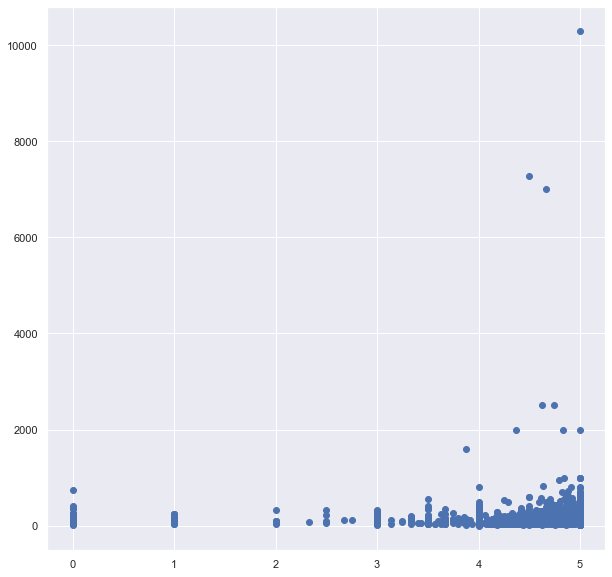

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(pricedf['review_scores_rating'], pricedf['price'])

In [10]:
test_df.head()

,amenities,count
0,Long term stays allowed,4157
1,Air conditioning,4107
2,Wifi,4086
3,Essentials,3641
4,Washer,3603


# Count number of amenities PER listing

In [11]:
amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)
amenities.head()

C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/2564024349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['amenities_count'] = amenities['amenities'].str.split(', ').apply(len)


,price,amenities,amenities_count
0,81.0,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,"Wifi, Washer, Kitchen, Long term stays allowed...",21


# Regression plot for price against amenities count per listing

<AxesSubplot:xlabel='amenities_count', ylabel='price'>

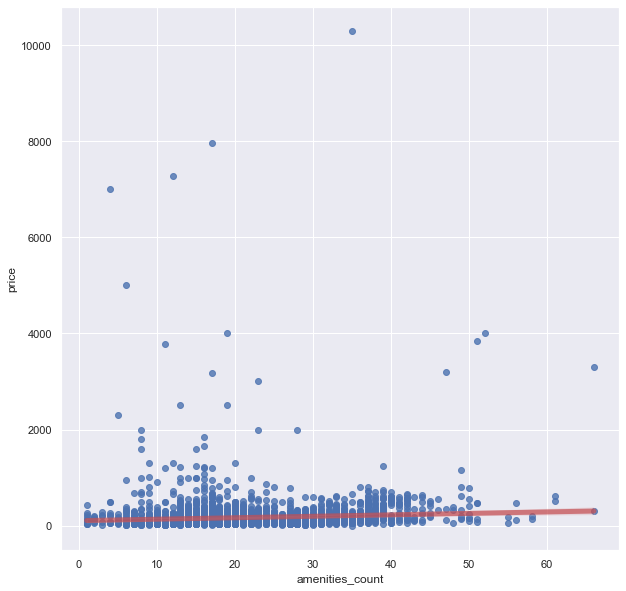

In [12]:
plt.figure(figsize=(10,10))
sb.regplot(y=amenities['price'], x=amenities['amenities_count'], line_kws={"color":"r","alpha":0.7,"lw":5})

In [13]:
amenities.insert(1, 'review_scores_rating', df['review_scores_rating'])
amenities.head()

,price,review_scores_rating,amenities,amenities_count
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21


# Scatter plot of amenity count against ratings

<AxesSubplot:xlabel='review_scores_rating', ylabel='amenities_count'>

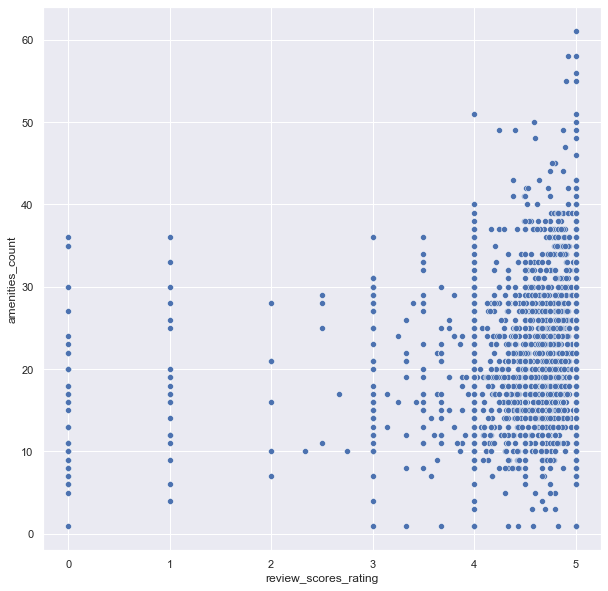

In [14]:
plt.figure(figsize=(10,10))
sb.scatterplot(x=amenities['review_scores_rating'], y=amenities['amenities_count'])

In [15]:
amenity_list_top5 = test_df['amenities'].head(5)
print(amenity_list_top5)

0    Long term stays allowed
1           Air conditioning
2                       Wifi
3                 Essentials
4                     Washer
Name: amenities, dtype: object


In [16]:
#check amenity list against amenity column to see if it exists, then
#then append column to dataframe

for i in amenity_list_top5:
    amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))
    
amenities.head()

C:\Users\limzi\AppData\Local\Temp/ipykernel_19572/402095591.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenities['has_{variable}'.format(variable=i.lower().strip())] = amenities['amenities'].apply(lambda x: str(i) in str(amenities['amenities']))


,price,review_scores_rating,amenities,amenities_count,has_long term stays allowed,has_air conditioning,has_wifi,has_essentials,has_washer
0,81.0,5.00,"Air conditioning, Elevator, Wifi, Long term st...",7,True,True,True,False,True
1,80.0,4.56,"Air conditioning, Kitchen, Elevator, Wifi, Gym...",12,True,True,True,False,True
2,67.0,4.88,"Air conditioning, Kitchen, Elevator, Wifi, Cab...",8,True,True,True,False,True
3,177.0,4.44,"Wifi, Washer, Kitchen, Long term stays allowed...",25,True,True,True,False,True
4,81.0,4.16,"Wifi, Washer, Kitchen, Long term stays allowed...",21,True,True,True,False,True
